# U.S. Medical Insurance Costs
## By Imrul Islam

### Setup Environment

In [1]:
import pandas as pd  # For data manipulation and analysis.
import numpy as np  # For numerical operations.
import matplotlib.pyplot as plt  # For creating static, interactive visualizations.
import seaborn as sns  # Provides a high-level interface for drawing attractive and informative statistical graphics.
from scipy import stats  # Includes a large number of probability distributions and statistical functions.
from scipy.stats import iqr


# Set the maximum number of rows to display to None to show all rows.
pd.set_option('display.max_rows', None)
# Set the maximum width in characters of a column to None to display the full width of each column.
pd.set_option('display.max_colwidth', None)

# Display the DataFrame in a scrollable area using the IPython display function.
from IPython.display import display

# Reset display options to default to improve notebook performance if it's running slow.
# Uncomment the following lines if needed.
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_colwidth')


In [38]:
# Load the dataset
us_medical_ins_dataset = pd.read_csv("insurance.csv")

# Display the first few rows to verify data loading and preview the dataset.
display(us_medical_ins_dataset.head())



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Visualizing Correlations: The Story of Numbers
A compelling heatmap unveils the relationships between numerical variables.

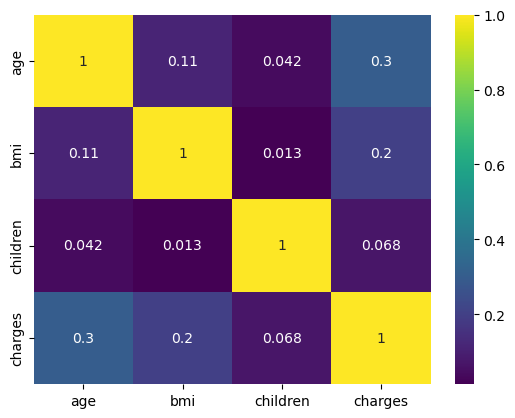

In [39]:
# This section calculates the correlation matrix for all numerical variables in the DataFrame.

#plt.figure(figsize=(10, 8))
# Let's truncate our DataSet to include only the numerical attributes
insurance_data = us_medical_ins_dataset[['age', 'bmi', 'children', 'charges']]

#Create correlation matrix
correlation_matrix = insurance_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.show()

# We observe that the there is  a strong linear correlation between the premium `charges` 
# and the number of `children`, which we will explore later.

### Observations from the Heatmap

Based on the heatmap image you have provided, here's an analysis of the correlation matrix displayed:

- The correlation coefficient between `age` and `charges` is 0.3, suggesting a moderate positive correlation. This indicates that as age increases, charges tend to increase as well, but the relationship is not particularly strong.
- The correlation coefficient between `bmi` and `charges` is 0.2, which is a weak positive correlation. It implies a slight tendency for higher BMI to be associated with higher charges, but it's a relatively weak effect.
- The correlation coefficient between `children` and `charges` is approximately 0.068, which is very weak. This suggests that the number of children has a negligible direct relationship with the charges in this particular dataset.
- The correlations between `age` and `bmi`, `age` and `children`, and `bmi` and `children` are all very weak, close to 0. This means there is no significant linear relationship between these pairs of variables.

The heatmap indicates that, in this dataset, none of the variables have a strong linear correlation with one another. The strongest observed relationship is between `age` and `charges`, but even this is only moderate.

It is important to note that correlation does not imply causation, and a weak correlation does not mean that there is no relationship between the variables—it might suggest that the relationship is not linear or is influenced by other factors not included in the correlation analysis.

### Preliminary Dataset Exploration
Understanding the structure and composition of the data.


In [40]:
# Print information about the US Medical Insurance dataset,
# including the number of entries, column names, non-null counts, and data types.
print(us_medical_ins_dataset.info())

# Display descriptive statistics for the US Medical Insurance dataset,
# including count, mean, standard deviation, minimum, quartiles, and maximum for numerical columns.
display(us_medical_ins_dataset.describe())

# The output from the `info()` method confirms that all columns have 1338 non-null entries,
# indicating that there are no missing values across all the columns.
# The `describe()` method provides a statistical summary of the numerical columns,
# detailing the central tendency, dispersion, and shape of the dataset's distribution.


print("Based on the dataset's information and statistical summary, "
      "\nwe can confirm that there are no missing values in any of the columns. "
      "\nThe data is complete, and we are ready to perform further analysis.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Based on the dataset's information and statistical summary, 
we can confirm that there are no missing values in any of the columns. 
The data is complete, and we are ready to perform further analysis.


In [41]:
# Calculate descriptive statistics for numerical columns
numerical_stats = us_medical_ins_dataset[['age', 'bmi', 'children', 'charges']].describe()

# Count frequency distribution of categorical data
gender_distribution = us_medical_ins_dataset['sex'].value_counts()
smoking_status_distribution = us_medical_ins_dataset['smoker'].value_counts()
regional_distribution = us_medical_ins_dataset['region'].value_counts()

# Display the descriptive statistics and frequency distributions
print("Descriptive Statistics for Numerical Data:")
display(numerical_stats)
print("\nGender Distribution:\n")
print(gender_distribution, '\n')
print("Smoking Status Distribution:\n")
print(smoking_status_distribution, '\n')
print("Regional Distribution:\n")
print(regional_distribution)


# Observations from the statistical summary:
# - The 'age' column ranges from 18 to 64, indicating a diverse age group within the dataset.
# - The 'bmi' column has a mean close to the overweight threshold, with a maximum of 53.13 and a minimum of 15.96,
#   suggesting a high average BMI among the policyholders.
# - The 'children' column suggests most policyholders have 0 to 2 children, as indicated by the 75th percentile.
# - The 'charges' column exhibits a large spread between the minimum and maximum values, 
#   indicating significant variability in insurance charges among the policyholders.

Descriptive Statistics for Numerical Data:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Gender Distribution:

sex
male      676
female    662
Name: count, dtype: int64 

Smoking Status Distribution:

smoker
no     1064
yes     274
Name: count, dtype: int64 

Regional Distribution:

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


### Health Insurance Data Overview: Demographics, BMI, Children, and Charges

**Age**: The dataset includes 1338 entries, with ages ranging from 18 to 64 years. The average age is approximately 39 years. The standard deviation suggests moderate age variability among the individuals.

**BMI**: The Body Mass Index (BMI) averages at around 30.6, with a standard deviation of approximately 6.1, indicating some variability in body weight relative to height. The BMI ranges from 15.96 to 53.13, with the 25th percentile around 26.3 and the 75th percentile at approximately 34.7.

**Children**: Participants in the dataset have an average of about 1 child, with a range from 0 to 5 children.

**Charges**: The charges (medicak insurance premium) have a large spread, with the average around \$13,270 and a wide range from approximately \$1,121 to \$63,770. The standard deviation is quite high at around \$12,110, indicating significant variation in charges among individuals.

**Gender Distribution**: The dataset is fairly balanced in terms of gender, with 676 males and 662 females.

**Smoking Status Distribution**: A minority of the individuals are smokers (274), compared to 1,064 non-smokers.

**Regional Distribution**: The dataset is nearly evenly distributed among four regions, with the southeast being slightly more represented (364) and the northeast slightly less (324).

The data suggests a well-distributed sample across age, gender, and regions, with a noteworthy spread in charges and BMI values. The proportion of smokers is less than the non-smokers in the sample.

## Analysis of Body Mass Index (BMI) Based on World Health Organization (WHO) Standards

#### Definition and Contextualization of BMI in Medical Insurance

- **Body Mass Index (BMI)** is a measure utilized to determine an individual's health weight in relation to their height, calculated by dividing the weight in kilograms by the square of the height in meters. It serves as a critical metric in medical insurance for assessing health risks and determining policy rates. However, it's crucial to acknowledge BMI's limitations, as it does not measure body fat directly nor account for muscle mass, age, gender, and ethnic differences. These factors can significantly influence health outcomes, making a holistic health assessment essential for accurate insurance risk evaluation.

#### Analysis of BMI Extremes and Their Implications

- The observed BMI values range from 15.96 to 53.13, indicating a broad spectrum of body weight relative to height among the insured individuals. Notably:
    - A BMI of **15.96** falls below the WHO's underweight threshold of **18.5**, potentially signaling health concerns or a data entry error that warrants further investigation.
    - Conversely, a BMI of **53.13** categorizes into the obesity range, highlighting serious health implications. It is vital to verify such extreme values for accurate recording and to assess their impact on insurance costs and health outcomes comprehensively.

### BMI Categorization based on WHO standards

#### BMI Weight Status

- **Below 18.5:** Underweight
- **18.5 – 24.9:** Healthy Weight
- **25.0 – 29.9:** Overweight
- **30.0 and Above:** Obesity

#### Distribution of BMI Categories and Health Risks

- The provided bar chart reveals a significant prevalence of overweight and obesity among the patients. This distribution underscores the need for targeted health interventions, considering the associated risks of cardiovascular diseases, diabetes, and certain cancers with higher BMI categories. Reflecting on the total of **1338** patient records, the high BMI prevalence calls for an evaluation of healthcare costs and the efficacy of current health policies.



Frequency Distribution of BMI Categories:


bmi_category
Obesity        707
Overweight     386
Normal         225
Underweight     20
Name: count, dtype: int64

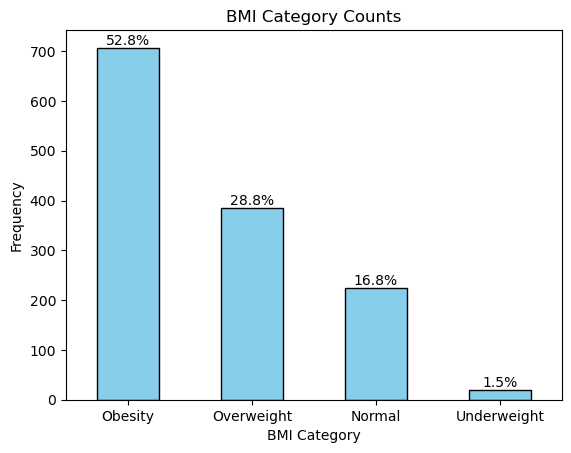

<Figure size 640x480 with 0 Axes>

In [42]:
bmi_bins = [0, 18.5, 25, 30, np.inf] # Define bins edges according to WHO standards

bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obesity'] # Labels for BMI categories

# Assign BMI categories to the dataset
us_medical_ins_dataset['bmi_category'] = pd.cut(
    us_medical_ins_dataset['bmi'],
    bins=bmi_bins,
    labels=bmi_labels,
    right=False # Indicates whether bins includes the rightmost edge or not.
)

# Calculate the counts for each BMI category
bmi_category_counts = us_medical_ins_dataset['bmi_category'].value_counts()
print("Frequency Distribution of BMI Categories:")
display(bmi_category_counts)

# Calculate the total number of records for percentage computation
total_records = us_medical_ins_dataset.shape[0]


# Visualizing BMI Categories
ax_bmi = bmi_category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
ax_bmi.set_title('BMI Category Counts')
ax_bmi.set_xlabel('BMI Category')
ax_bmi.set_ylabel('Frequency')


# Adding text labels on top of each bar
for bar in ax_bmi.patches:
    count = int(bar.get_height())
    percentage = f'{(count / total_records) * 100:.1f}%'
    ax_bmi.text(
        x=bar.get_x() + (bar.get_width() / 2), # Center x-coordinate for text placement
        y=bar.get_height(), # The y-coordinate of the text's location
        s=f'{percentage}', # The text string to be displayed
        ha='center', # Horizontal alignment of text
        va='bottom' # Vertical alignment of text
        
    )
    
# Set the x-axis tick labels to be horizontal for better readabiity  
plt.xticks(rotation=0)

# Display the plot
plt.show()
# Clear the current figure after plotting to avoid overlaying of figures later
plt.clf()

### Analyzing Insurance Charges and BMI: Assessing Extremes and Health Risk Implications 

- **Insurance Charges**:The maximum insurance charge is \\$63,770, which is significantly higher than the mean of \$13,270. This warrants further investigation to determine whether this is an outlier caused by extreme cases or errors in the data, or if it reflects a subset of individuals with exceptionally high medical expenses, possibly due to chronic conditions or high-risk factors.

The Interquartile Range (IQR) method is selected for outlier detection due to its resilience against extreme values. Unlike mean-based methods, which can be heavily influenced by outliers themselves, the IQR focuses on the middle 50% of the data. This characteristic makes it exceptionally suitable for identifying outliers in 'charges' and 'bmi' without the results being skewed by unusually high or low values.

Understanding the distribution of 'charges' and 'bmi' through the IQR method allows us to identify data points that deviate significantly from the typical range. These outliers can have a profound impact on dataset analysis and decision-making processes. For instance, in healthcare studies, outliers in 'charges' may indicate unusual treatment costs that require further investigation, while extreme 'bmi' values might highlight data entry errors or special cases in patient health conditions.

Recognizing and addressing outliers is crucial. They can affect the outcomes of statistical analyses, such as mean and standard deviation calculations, potentially leading to misleading conclusions. By identifying and potentially removing or adjusting these outliers, we ensure a more accurate representation of the dataset, facilitating informed decisions based on the true nature of the data.


#### Function Definitions

In [45]:
## Outlier Filtering Function
def filter_outliers(data, column_name):
    """
    Filter outliers from a dataset based on the IQR method for a specific column,
    using library functions directly.

    Parameters:
    - data: DataFrame containing the dataset.
    - column_name: String representing the column to filter outliers from.

    Returns:
    - filtered_data: DataFrame containing outliers based on the IQR method.
    """
    # Calculate the IQR using scipy.stats.iqr
    IQR_value = iqr(data[column_name])

    # Calculate the Q1 and Q3 using pandas quantile function
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Define the threshold for outliers 
    threshold = 1.5 * IQR_value

    # Filter the dataset to select or keep outliers based on the IQR method 
    filtered_data = data[
        (data[column_name] > (Q3 + threshold)) |
        (data[column_name] < (Q1 - threshold))
    ].sort_values(by=column_name) # Sort in ascending order based on column_name

    return filtered_data


In [55]:
## Outlier Display Function
def display_outliers(dataframe, column_name="data", show=False):
    """
    Display potential outliers for a specified column in the given DataFrame.

    Parameters:
    - dataframe: DataFrame containing outliers to be displayed.
    - column_name: String representing the name of the column for which outliers are displayed.
    - show: Boolean flag indicating whether to display the outliers.

    If show is True, the function prints and displays the dataframe with outliers.
    """
    if show:
        print(f"Potential outliers in {column_name}:")
        display(dataframe) # Utilize IPython.display.display for enhanced output in notebooks

In [60]:
# Identify and Display Outliers for 'charges'
charges_outliers_df = filter_outliers(us_medical_ins_dataset, 'charges')
display_outliers(charges_outliers_df, column_name="insurance charges", show=False)

# Analysis of outliers in 'charges'
print("\nAnalysis of Outliers in Insurance Charges:")
print("The examination of outliers in insurance charges reveals a notable pattern. A significant proportion of these outliers are individuals classified as obese," 
      "\nwith many also having a smoking history. This observation aligns with existing research indicating that obesity and smoking are factors that can significantly  " 
      "\nincrease medical expenses. However, it's important to consider that these findings are based on the dataset's specific context and should not be generalized" 
      "\nwithout further statistical analysis.")
      


Analysis of Outliers in Insurance Charges:
The examination of outliers in insurance charges reveals a notable pattern. A significant proportion of these outliers are individuals classified as obese,
with many also having a smoking history. This observation aligns with existing research indicating that obesity and smoking are factors that can significantly  
increase medical expenses. However, it's important to consider that these findings are based on the dataset's specific context and should not be generalized
without further statistical analysis.


In [63]:
## Identify and Display Outliers for 'bmi'
bmi_outliers_df = filter_outliers(us_medical_ins_dataset, 'bmi')
display_outliers(bmi_outliers_df, column_name="BMI levels", show=False)

# Analysis of outliers in 'bmi'
print("\nAnalysis of Outliers in BMI:")
print("The analysis of BMI outliers reveals a majority are classified as 'obese', adhering to the standard threshold of a BMI of 30 or above. This observation underscores" 
      "\nthe need for careful interpretation of high BMI values and their health implications, emphasizing the importance of a nuanced and respectful approach to health" 
      "\ndata analysis.")


Analysis of Outliers in BMI:
The analysis of BMI outliers reveals a majority are classified as 'obese', adhering to the standard threshold of a BMI of 30 or above. This observation underscores
the need for careful interpretation of high BMI values and their health implications, emphasizing the importance of a nuanced and respectful approach to health
data analysis.


### Age Distribution Analysis

1. The average age of individuals in the dataset is approximately 39.21 years.
2. The age data exhibits variability, as indicated by the standard deviation of approximately 14.05 years.
3. The youngest individual in the dataset is 18 years old, and the oldest is 64 years old.
4. The median age, which is the 50th percentile, is also approximately 39 years, indicating that half of the individuals are younger than 39 and half are older.
5. The 25th percentile is 27 years, meaning that 25% of the individuals are 27 years old or younger.
6. The 75th percentile is 51 years, which implies that 75% of the individuals are 51 years old or younger.
7. The data is not heavily skewed since the mean and median are very close in value.

From these points, we can determine that the age distribution spans a wide range but centers around the late 30s to early 40s. The relatively high standard deviation suggests a broad spread of ages within the dataset. The fact that the mean and median are close indicates the distribution may be symmetric around the central value, but the histogram examined suggests this may not be a simple symmetric distribution.



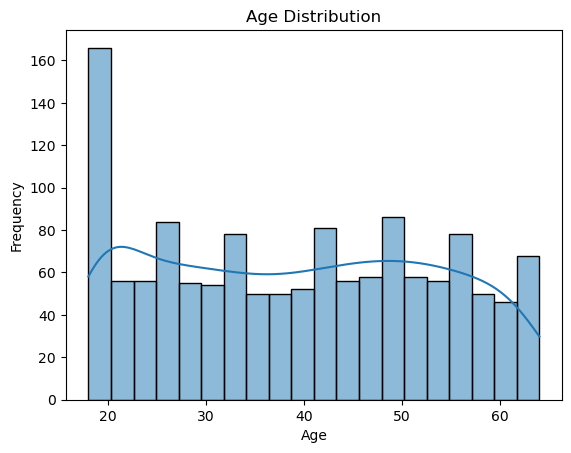

Age Data Descriptive Statistics:


count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

<Figure size 640x480 with 0 Axes>

In [98]:
# Plotting the age distribution from the medical insurance dataset
age_data = us_medical_ins_dataset['age']  # Extracting age data for readability and reuse
bins_number = 20  # Defining the number of bins for the histogram

sns.histplot(age_data, bins=bins_number, edgecolor='black', kde=True)  # Creating the histogram
plt.title('Age Distribution')  # Setting the title of the histogram
plt.xlabel('Age')  # Labeling the x-axis as 'Age'
plt.ylabel('Frequency')  # Labeling the y-axis as 'Frequency'
plt.show()  # Displaying the plot
plt.clf()  # Clearing the figure to ensure no overlap if plotting again

# Descriptive Statistics
print('Age Data Descriptive Statistics:')
display(age_data.describe())


## Children Count Analysis 

This section examines the distribution of the number of children among the insurance policyholders. The bar chart below illustrates the number of policyholders for each count of children covered.

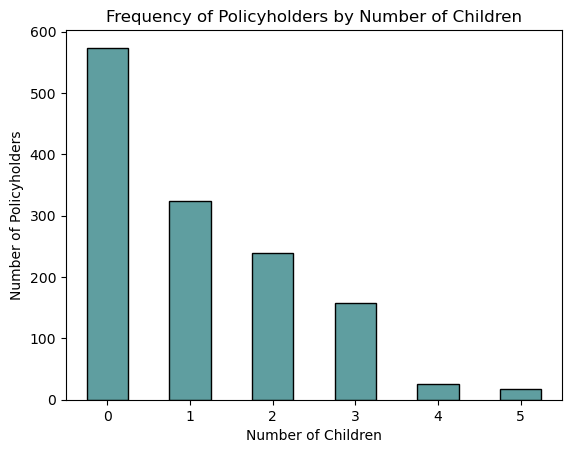

<Figure size 640x480 with 0 Axes>

In [ ]:
# Children Count Summary 
children_counts = us_medical_ins_dataset['children'].value_counts()
children_counts.sort_index().plot(kind='bar', color='cadetblue', edgecolor='black')
plt.title('Frequency of Policyholders by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Policyholders')
plt.xticks(rotation=0)
plt.show()
plt.clf()

### Exploring the Impact of Family Size on Insurance Premiums

In [102]:
# Median and average insurance premium by number of children
median_premium_by_child = us_medical_ins_dataset.groupby('children')['charges'].median()
average_premium_by_child = us_medical_ins_dataset.groupby('children')['charges'].mean()

# Display the median and average premiums 
print("Median Premium by Number of Children:")
print(median_premium_by_child)
print("\nAverage Premium by Number of Children:")
print(average_premium_by_child, '\n')


print("The lack of consistent increase in the median insurance premium with more children suggests \n"
     "that additional factors beyond family size may be influencing insurance costs.")


Median Premium by Number of Children:
children
0     9856.95190
1     8483.87015
2     9264.97915
3    10600.54830
4    11033.66170
5     8589.56505
Name: charges, dtype: float64

Average Premium by Number of Children:
children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64 

The lack of consistent increase in the median insurance premium with more children suggests 
that additional factors beyond family size may be influencing insurance costs.


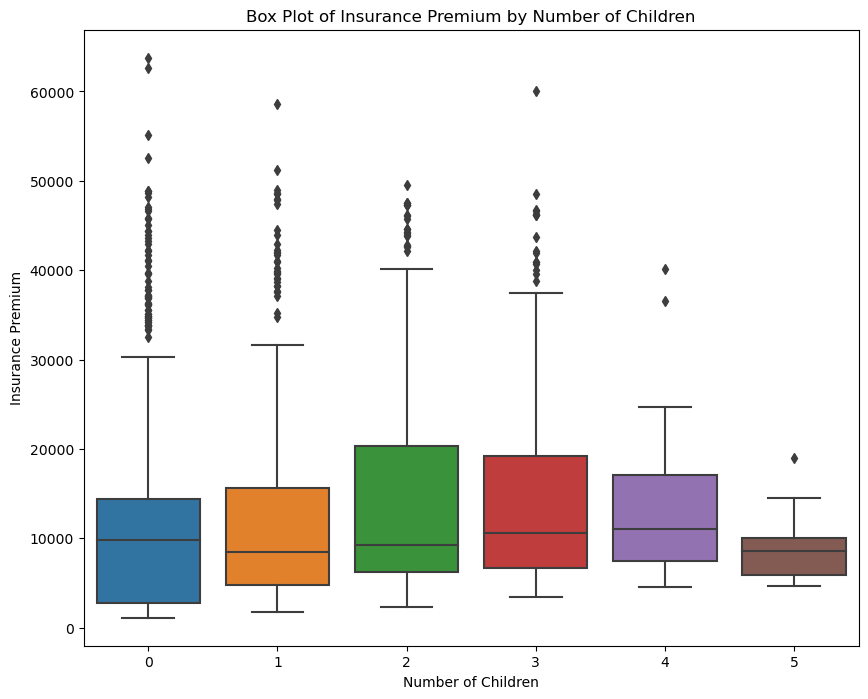

<Figure size 640x480 with 0 Axes>

In [100]:
# Box Plot for Insurance Premium vs Number of Children 
plt.figure(figsize=(10,8))
sns.boxplot(
    x='children',
    y='charges',
    data=us_medical_ins_dataset
)
plt.title('Box Plot of Insurance Premium by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Insurance Premium')
plt.show()
plt.clf()



### **Unpacking the Dynamics of Family Size on Insurance Premium:**

The data indicates that insurance premiums generally rise with the number of children up to three, after which they plateau or decrease. The average and median premiums suggest that while costs tend to increase with family size, there are high-premium outliers skewing the average upwards, particularly for families with fewer children. The box plot confirms this skewed distribution and reveals the presence of outliers across all family sizes. These patterns may reflect the varying health risks and insurance needs of families, with larger families possibly benefiting from economies of scale or lower per-person costs. 

### Next Steps in Analysis:

Future analysis should aim to:

1. Clarify why premiums drop for families with more than three children—statistical quirk or real trend?
2. Use regression to understand how much each child adds to the premium, considering other factors.
3. Investigate outliers to determine their causes.
4. Conduct a longitudinal study to see if these patterns hold over time.

By focusing on these areas, we can better grasp how family size impacts insurance costs.

## Regional Analysis 

The average insurance premium by region:
region
southwest    12346.937377
northwest    12417.575374
northeast    13406.384516
southeast    14735.411438
Name: charges, dtype: float64



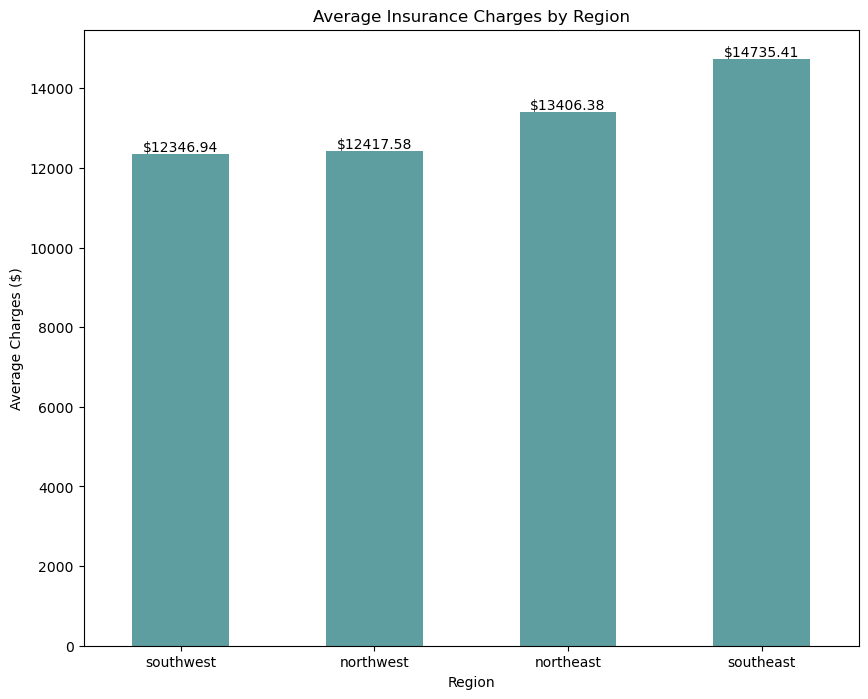

The Southeast region has the highest average insurance premium of approximately $14735.41.

The bar plot above shows the average insurance charges for each region.
This helps us to visually compare which regions have higher or lower average charges.
Further analysis could involve examing why certain regions have higher charges-
this might be due to differences in economic status, cost of living, or prevalence of certain health conditions.


<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculate and print the average insurance charges by region 

plt.figure(figsize=(10, 8))

avg_charges_by_region_df = us_medical_ins_dataset.groupby('region')['charges'].mean().sort_values()
print(f'The average insurance premium by region:\n{avg_charges_by_region_df}\n')


# Plotting the average charges by region as as a bar chart
ax_region = avg_charges_by_region_df.plot(
    kind='bar',
    color='cadetblue',
    title='Average Insurance Charges by Region'  
    )

# Annotate each bar with the average charge
for bar in ax_region.patches:
    bar_x = bar.get_x() + (bar.get_width() / 2) # Center the text
    bar_height = bar.get_height() # Get the height of the bar
    ax_region.text(
    x=bar_x, # The x-coordinate to place the text
    y=bar_height, # The y-coordinate to place the text
    s=f'${round(bar_height, 2)}', # The text
    ha='center', # Horizontal alignment 
    va='bottom' # Vertical alignment
    )
    
# Labeling the axes 
plt.xlabel('Region')
plt.ylabel('Average Charges ($)')
plt.xticks(rotation=0) # Ensure the region names are horizontal for better readability

# Display the plot
plt.show()

# Clear the figure
plt.clf()

# Analyze the result

highest_avg_region = avg_charges_by_region_df.idxmax().capitalize()
highest_avg_charge = avg_charges_by_region_df.max()
print(f"The {highest_avg_region} region has the highest average insurance premium of \
approximately ${highest_avg_charge:.2f}.\n")

print(
    "The bar plot above shows the average insurance charges for each region.\n"
    "This helps us to visually compare which regions have higher or lower average charges.\n"
    "Further analysis could involve examing why certain regions have higher charges-\n"
    "this might be due to differences in economic status, cost of living, or prevalence of certain health conditions."
    )

## Gender Analysis 


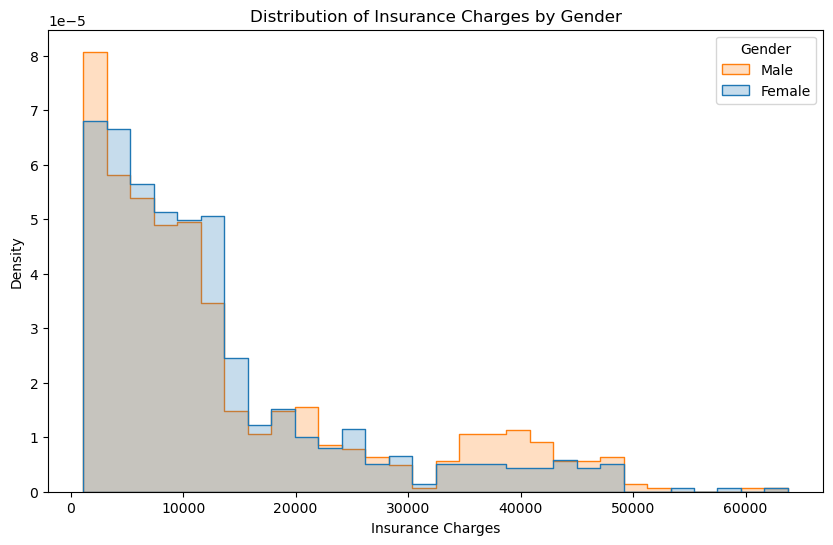

<Figure size 640x480 with 0 Axes>

In [ ]:
# Filter data for males and females
male_charges = us_medical_ins_dataset[us_medical_ins_dataset['sex'] == 'male']['charges']
female_charges = us_medical_ins_dataset[us_medical_ins_dataset['sex'] == 'female']['charges']

# Plotting the distributio of charges by gender
plt.figure(figsize=(10, 6))
sns.histplot(
    data=us_medical_ins_dataset,
    x='charges',
    hue='sex',
    element='step',
    stat='density',
    common_norm=False,
    legend=True
    )
plt.title('Distribution of Insurance Charges by Gender')
plt.xlabel('Insurance Charges')
plt.ylabel('Density')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()
plt.clf()

### Hypothesis Testing: Gender and Insurance Premium 

In [ ]:
# Assumption of Identical Variances
# The independent samples t-test assumes that the two groups have identical variances, 
# also known as homogeneity of variances. 

# Check for equality of variances (homogeneity of variances) using Levene's t-test
alpha = 0.05 # Assuming alpha level of significance

# Null Hypothesis (H0): Variances are equal
# Alternative Hypothesis (H1): Variances are not equal 


# The overlapping histograms above shows that the two samples are not normally distributed, therefore, use 
# Levene's test to check if the variances are eqaul or not.
levene_p_value_for_gender = stats.levene(male_charges, female_charges).pvalue
print(f"Levene's test P-value: {levene_p_value_for_gender:.7f}")

# Interpret the result of Levene's test

if levene_p_value_for_gender < alpha:
    print("Reject the null hypothesis for Levene's test - variances are not equal.\n")
else:
    print("Fail to reject the null hypothesis for Levene's test - variances are equal.\n")

    
# Since Variances are unequal, we use Welch's test for comparison of means 

avg_premium_paid_by_male = male_charges.mean()
avg_premium_paid_by_female = female_charges.mean()

print(f'The average insurance premium paid by male is approximately: {avg_premium_paid_by_male:.2f}\n')
print(f'The average insurance premium paid by female is approximately: {avg_premium_paid_by_female:.2f}\n')

# Hypotheses for Welch's test
# H0: No significant difference in the mean insurance premium between genders.
# H1: Significant difference in the mean insurance premium between  genders.
                           
welch_p_value_for_gender = stats.ttest_ind(male_charges, female_charges, equal_var=False).pvalue
print(f"Welch's test p-value for premium paid by gender: {welch_p_value_for_gender:.7f}.")

# Interpret the result of Welch's t-test 
if welch_p_value_for_gender < alpha:
    print("Reject the null hypothesis: Evidence suggests a significant difference in the insurance premium paid \
between\n""genders.\n")
else:
    print("Fail to reject the null hypothesis: Evidence suggests no significant difference in the insurance \
premium paid between genders.\n")




Levene's test P-value: 0.0016809
Reject the null hypothesis for Levene's test - variances are not equal.

The average insurance premium paid by male is approximately: 13956.75

The average insurance premium paid by female is approximately: 12569.58

Welch's test p-value for premium paid by gender: 0.0358410.
Reject the null hypothesis: Evidence suggests a significant difference in the insurance premium paid between
genders.



## Smoking Status Analysis 

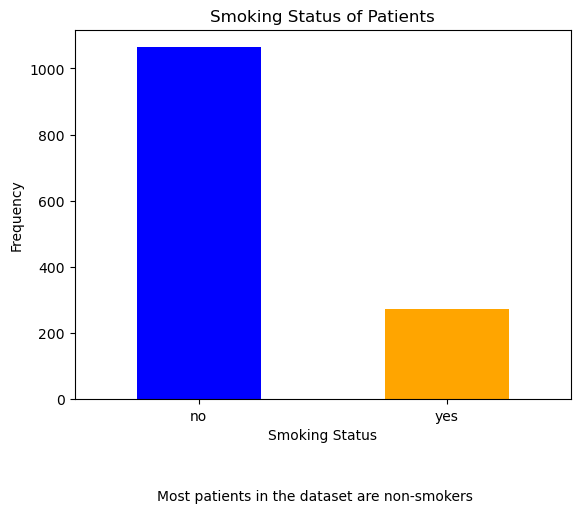

In [ ]:
# Smoking Status Bar Chart 
smokers_count = us_medical_ins_dataset['smoker'].value_counts()
smokers_count.plot(kind='bar', color=['blue', 'orange'])
plt.title('Smoking Status of Patients')
plt.xlabel('Smoking Status')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.figtext(0.5, -0.10, 'Most patients in the dataset are non-smokers', ha='center', fontsize=10)
plt.show()




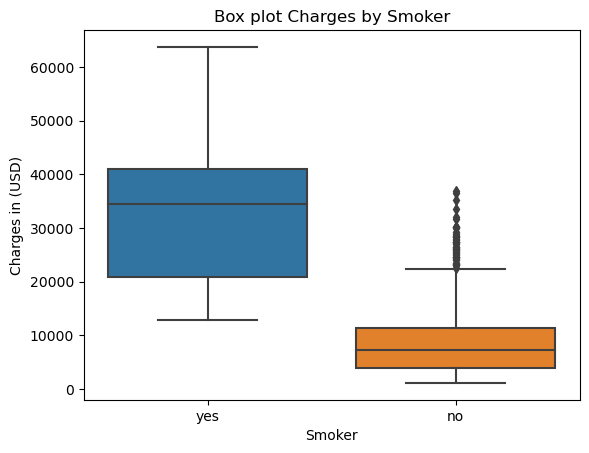

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [ ]:
# Box Plot for `charges` by `smoker` status
# Box plots are useful for showing the median, quartiles, and detecting outliers.
sns.boxplot(
    x='smoker',
    y='charges',
    data=us_medical_ins_dataset
) 
plt.title('Box plot Charges by Smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges in (USD)')
plt.show()

# We ought to conduct a hypotheis thesting here (done below)
# We observe that there is a significant difference in premium charges for smoker vs non-smoker.
smoker_status = us_medical_ins_dataset.groupby('smoker')['charges'].mean()

# The median price for smoker is approximately $32,050.23
# The median price for non-smoker is approximately $8,434.27
smoker_status





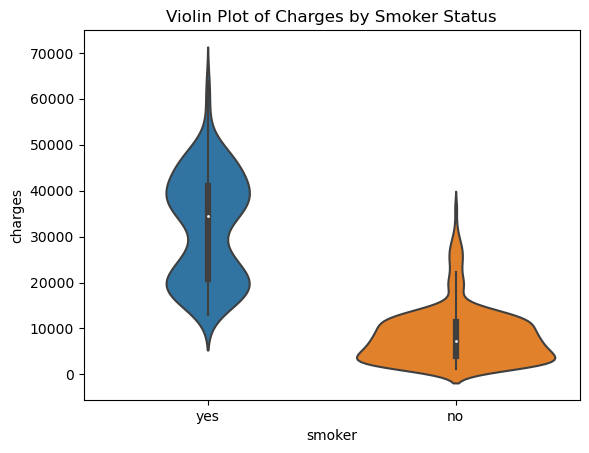

In [ ]:
# Create violin plots for `charges` grouped by `smoker` status
sns.violinplot(
    x='smoker',
    y='charges',
    data=us_medical_ins_dataset
)

plt.title('Violin Plot of Charges by Smoker Status')
plt.show()


# The plot for non-smokers ('no') shows a large area near zero, suggesting a higher density of non-smokers with low medical insurance charges. 
# Similarly, any gaps or narrow points in the violin suggest a lower density of data points (fewer individuals with charges in that range).

##### By examining both violin plot and box plot, we can conclude that smokers generally face insurance charges than non-smokers. The variability (lack of fixed pattern) of insurance premium is also greater among smokers. 


### Statistical Tests for Smoking Status and Insurance Premium

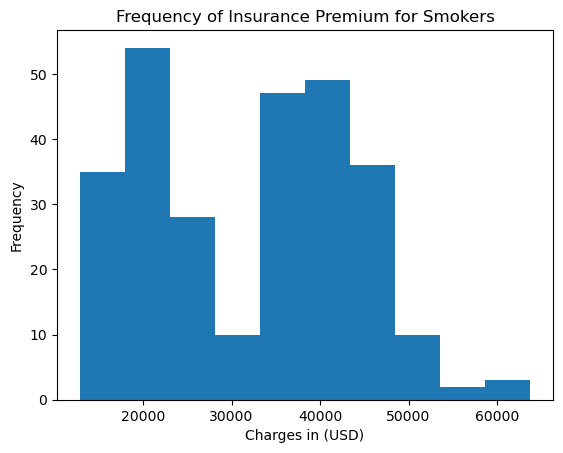

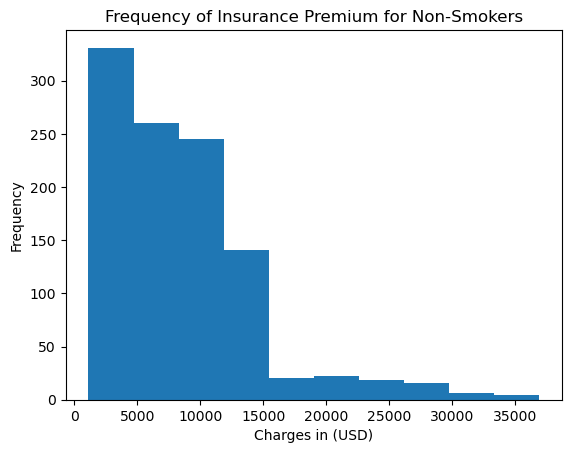

<Figure size 640x480 with 0 Axes>

In [ ]:

# Check the shape of the distributions of premium charges seperately for smokers and non-smokers
# We want to determine whether there is statistically significant difference between the mean of insurance premium paid by smokers vs non-smokers.

# Insurance Premium Distribution for Smokers
plt.hist(us_medical_ins_dataset[us_medical_ins_dataset['smoker'] == 'yes']['charges'])
plt.title('Frequency of Insurance Premium for Smokers')
plt.xlabel('Charges in (USD)')
plt.ylabel('Frequency')
plt.show()
plt.clf()


# Insurance Premium Distribution for Non-Smokers
plt.hist(us_medical_ins_dataset[us_medical_ins_dataset['smoker'] == 'no']['charges'])
plt.title('Frequency of Insurance Premium for Non-Smokers')
plt.xlabel('Charges in (USD)')
plt.ylabel('Frequency')
plt.show()
plt.clf()


# We observe that our distributions of the Insurance Premium for smokers and non-smokers are not normally 
# distributed. Nonetheless, thanks to the Central Limit Theorem , we can run t-test to determine whether 
# the two means are statistically significantlly different. 
# But first we must ensure the variances of two distributions are equal.

# Given these skewed distributions, it would be more appropriate to use Levene's test for evaluating the 
# equality of variances,as it is less sensitive to the non-normality in the data. 

In [ ]:
# Levene's t-test

# Seperate the charges for smokers and non-smokers
charges_smokers = us_medical_ins_dataset[us_medical_ins_dataset['smoker']=='yes']['charges'] 
charges_nonsmokers = us_medical_ins_dataset[us_medical_ins_dataset['smoker'] == 'no']['charges']

# Assuming alpha level of significance
alpha = 0.05

# Hypothesis Testing for Variances
# Null Hypothesis (HO): The variances for the insurance premiums paid by smokers and non-smokers are equal.
# Alternative Hypothesis (H1): The variances of the insurance premiums paid by smokers and non-smokers are not equal.

# Perform Levene's test for equal variances
levenes_stat, levenes_p_val = stats.levene(charges_smokers, charges_nonsmokers)
print(f"Levenes's test p-value: {levenes_p_val}")

# Interpret the result of Levene's test 
if levenes_p_val < alpha:
    print("Reject the null hypothesis for Levene's test: variances are not equal. Therefore proceed with Welch's t-test.")
else:
    print("Fail to Reject the null hypothesis for Levene's test: variances are equal. Proceed with a sandard two-sample t-test.")



# Analysis of the results
# The Levene's test have returned extremely low p-value, which suggests that the assumption of equal 
# variances between the two groups is violated.

# The extremely low p-values indicate that we can reject the null hypothesis of equal variances with a 
# very high degree of confidence.

# Therefore, any subsequent analysis comparing the means of these two groups should not assume equalvariances.
# This suggests the use of Welch's t-test, which does not assume equal variances, for comparing the means of the two samples.



Levenes's test p-value: 1.5593284881803726e-66
Reject the null hypothesis for Levene's test: variances are not equal. Therefore proceed with Welch's t-test.


In [ ]:
# Perform Welch's t-test, which does not assume equal sample variances
welchs_t_stat, welchs_p_val = stats.ttest_ind(charges_smokers, charges_nonsmokers, equal_var=False)
print(f"Welch's t-test p-value: {welchs_p_val}")

# Interpret the result of Welch's t-test
# Null Hypothesis (H0): There is no significant difference in the mean insurance charges between smokers and non-smokers.
# Alternative Hypothesis (H1): There is a significant difference in the mean insurance charges between smokers and non-smokers.
if welchs_p_val < alpha:
    print("Reject the null hypothesis: Evidence suggests there is a significant difference in the mean isurance premiums `charges` \
between smokers and non-smokers.")
else:
    print("Fail to reject the null hypothesis: Evidence does not suggest a significant difference in the mean insurance premiums `charges`\
between smokers and non-smokers.")

Welch's t-test p-value: 5.88946444671698e-103
Reject the null hypothesis: Evidence suggests there is a significant difference in the mean isurance premiums `charges` between smokers and non-smokers.


Our dataset consists of medical charges for two groups: smokers and non-smokers. Initial visual inspection revealed a non-normal distribution for both groups, with smokers showing higher variability in charges.

Before comparing the means of these two groups, we conducted Levene's test to assess the equality of variances. The test returned p-values significantly below the conventional alpha level of 0.05, indicating strong evidence against the assumption of equal variances.

Given the large sample size, the Central Limit Theorem assures us that the distribution of the sample means will be approximately normal. Therefore, despite the original non-normal distribution of charges, we can proceed with mean comparison tests that assume normality for the means.

However, due to the confirmed inequality of variances, we are choosing Welch's t-test over the standard t-test. Welch's t-test does not assume equal variances and is robust to the non-normality of data, making it a suitable choice for our analysis. This test will allow us to determine if the difference in mean charges between smokers and non-smokers is statistically significant.

### Evidence suggests there is a significant difference in the mean insurance premiums `charges` between smokers and non-smokers.

The significant difference in insurance premiums between smokers and non-smokers underscores the financial impact of smoking on healthcare costs. For insurance companies, this finding supports the rationale for premium differentiation based on smoking status, allowing for more accurate risk management and potentially encouraging healthier lifestyles among policyholders. For individuals, it highlights the importance of lifestyle choices on financial aspects of healthcare, possibly motivating behavior change. 

# Conclusion:




Our analysis dives deep into the dataset to uncover the intricate factors affecting insurance premiums among policyholders. This exploration reveals the complex interplay of demographic details, lifestyle choices, and family dynamics on insurance costs, offering a comprehensive understanding of what drives changes in premium rates.

#### Key Findings from the Analysis

1. **Demographic Insights**: The dataset spans a broad age range of 18 to 64 years, with a significant concentration of individuals between 20 to 30 years. This young demographic, mostly at the beginning of their careers, could be contributing to the overall trend of lower insurance charges due to generally lower medical costs associated with younger age groups.

2. **Health and Lifestyle Impact**: A noteworthy finding is the high average Body Mass Index (BMI), nearing the overweight threshold, among policyholders. The data shows a significant number of individuals classified as overweight or obese, raising concerns over potential health risks and higher healthcare costs. This situation calls for targeted health interventions.

3. **Family Dynamics and Insurance Costs**: Analysis of family size from no children to five children reveals intricate patterns affecting insurance premiums. While there is a general trend of increasing median premiums with the addition of dependents, exceptions exist, indicating other factors influence insurance costs. Notably, families with five children experience a surprising drop in average premiums, suggesting policy adjustments or special rate considerations might be in effect.

4. **Geographical Variations and Gender Differences**: The Southeast region is highlighted for its higher average insurance premiums, suggesting geographical factors at play. Additionally, gender analysis shows males paying higher premiums on average than females, with statistical tests confirming significant differences in premiums based on gender.

5. **The Impact of Smoking**: A stark contrast in premiums between smokers and non-smokers underscores the financial burden of smoking on healthcare costs. This distinction validates insurance companies' premium differentiation practices based on smoking status and highlights the broader implications of lifestyle choices on health expenses.

#### Recommendations for Insurance Companies

- **Health Promotion Initiatives**: With the prevalent issue of overweight and obesity, insurance companies are encouraged to invest in health promotion and disease prevention programs. These efforts can lead to improved health outcomes for insured individuals, reducing long-term healthcare costs.

- **Data Accuracy and Interpretation**: Ensuring the accuracy of data collection and its interpretation is critical for effective risk assessment and policy making. Accurate data supports informed decision-making and helps in the development of fair and equitable insurance policies.

#### Final words:

Our comprehensive dataset analysis underscores the multifaceted nature of insurance premium determinants, emphasizing the importance of BMI, lifestyle choices, and family size in risk assessment. However, it also points out the limitations of relying solely on these factors, advocating for a broader approach to health evaluation. The prevalence of high BMI levels highlights a public health issue, necessitating targeted interventions and policy adjustments. Insurance companies play a pivotal role in fostering healthier lifestyles and preventive healthcare measures, which can ultimately result in reduced healthcare costs and healthier insured populations. This analysis not only informs policy formulation but also encourages individual actions towards healthier living, managing health risks, and efficiently controlling insurance expenses.